Publish with us on Medium at https://medium.com/towards-data-science

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

Employee satisfaction level
Last evaluation
Number of projects
Average monthly hours
Time spent at the company
Whether they have had a work accident
Whether they have had a promotion in the last 5 years
Department
Salary
Whether the employee has left
*This dataset is simulated


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
hr = pd.read_csv('HR.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.shape

(14999, 10)

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
hr.isnull().any().sum()

0

In [7]:
hr_left = hr['left'].value_counts()
print hr_left

0    11428
1     3571
Name: left, dtype: int64


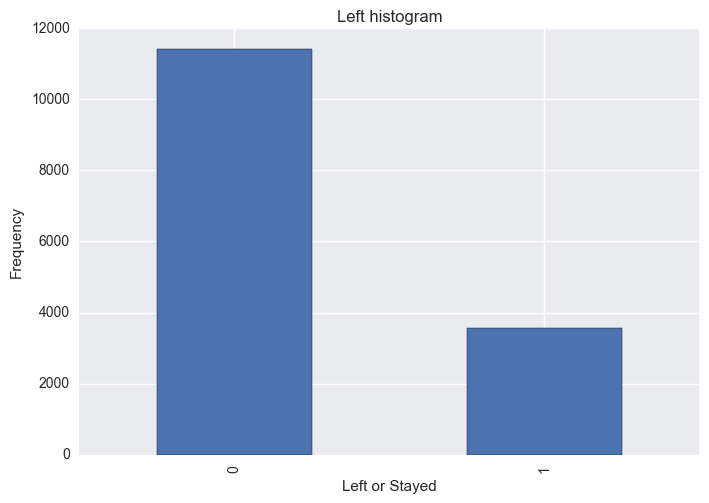

In [8]:
hr_left.plot(kind = 'bar')
plt.title("Left histogram")
plt.xlabel("Left or Stayed")
plt.ylabel("Frequency")

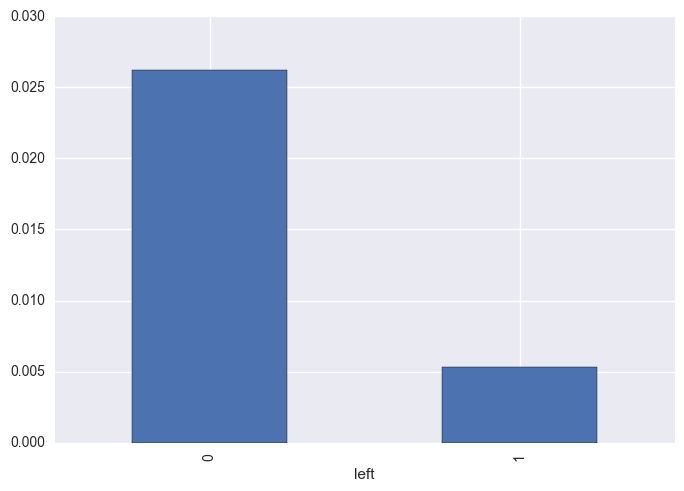

In [9]:
p1 = hr.pivot_table(
     
    columns='left',
    values="promotion_last_5years"
)
p1.plot(kind = 'bar')

In [10]:
#First check what string values are
hr['sales'].unique(),hr['salary'].unique()



(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [11]:
#Convert 'sales' and 'salary' to numeric
hr['sales'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
hr['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

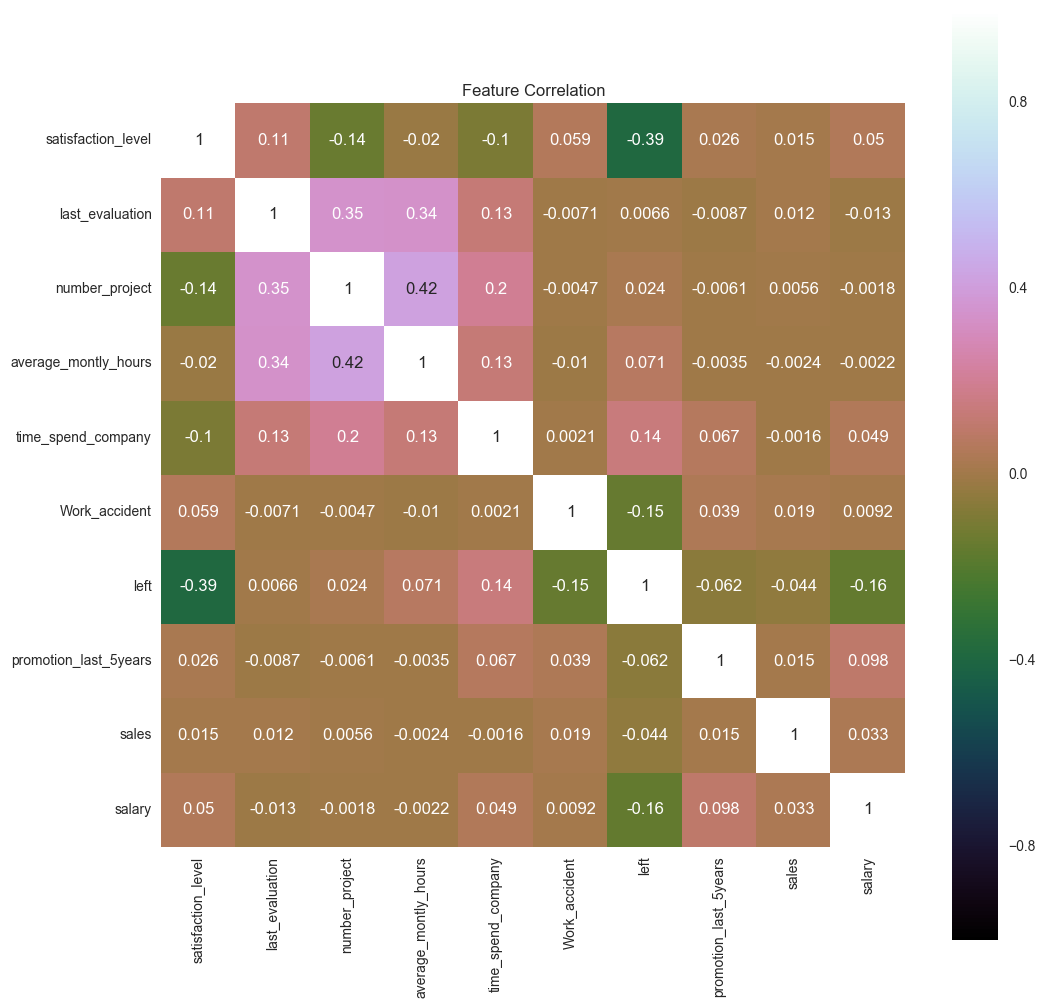

In [12]:
cor = hr.corr()
plt.figure(figsize = (12,12))
sb.heatmap(cor, vmax = 1, square = True, annot = True, cmap = 'cubehelix')
plt.title('Feature Correlation')

In [13]:
cor_left = pd.DataFrame(cor['left'].drop('left'))
cor_left.sort_values(by = 'left', ascending = True)


,left
satisfaction_level,-0.388375
salary,-0.157898
Work_accident,-0.154622
promotion_last_5years,-0.061788
sales,-0.043814
last_evaluation,0.006567
number_project,0.023787
average_montly_hours,0.071287
time_spend_company,0.144822


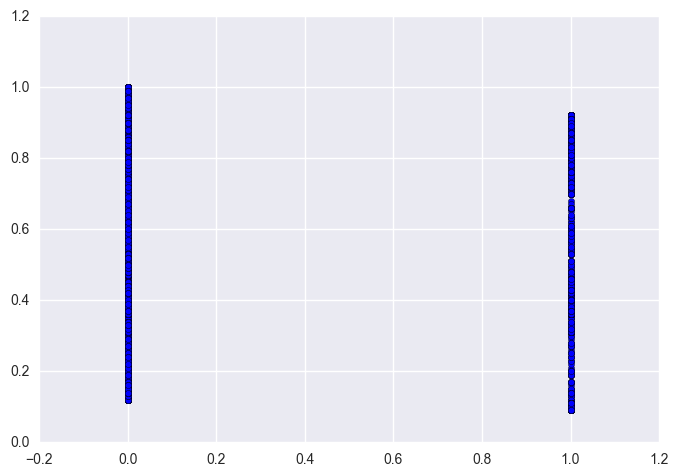

In [14]:
plt.scatter(hr['left'], hr['satisfaction_level'])

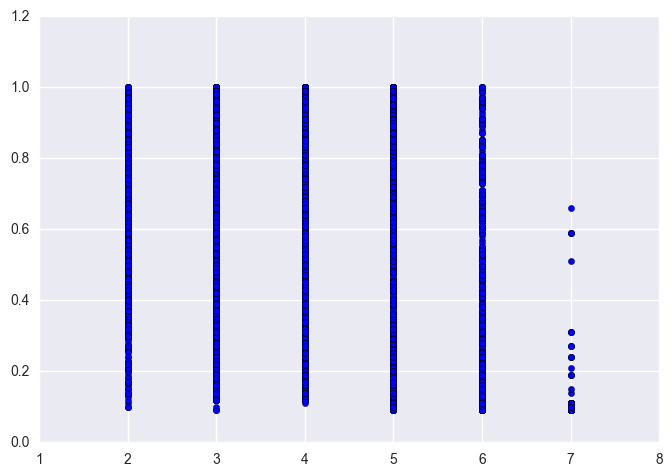

In [15]:
plt.scatter(hr['number_project'], hr['satisfaction_level'])

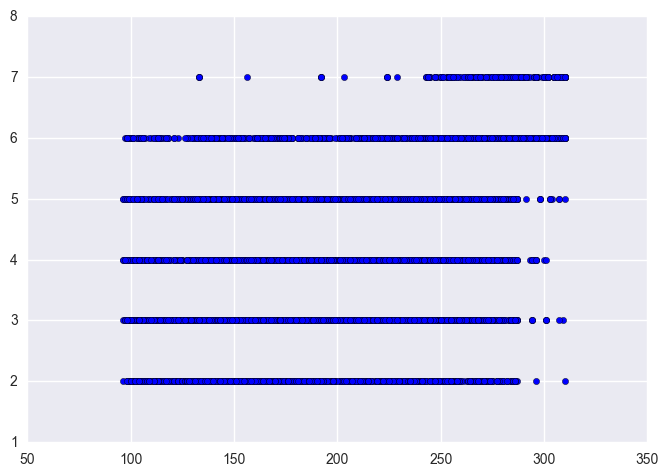

In [16]:
plt.scatter(hr['average_montly_hours'],hr['number_project'] )

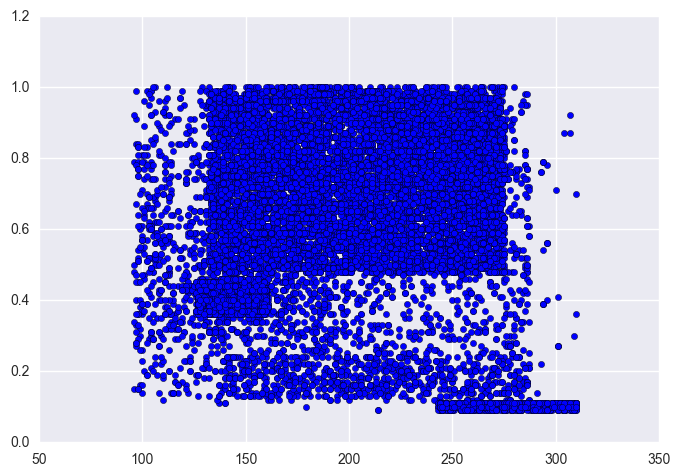

In [17]:
plt.scatter(hr['average_montly_hours'], hr['satisfaction_level'])

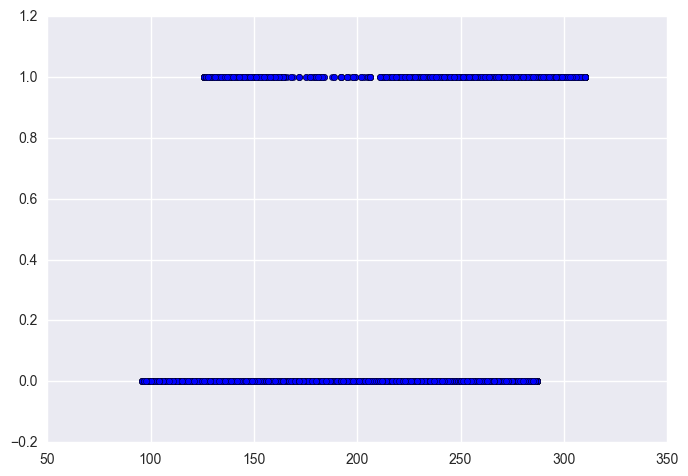

In [18]:
plt.scatter(hr['average_montly_hours'], hr['left'])

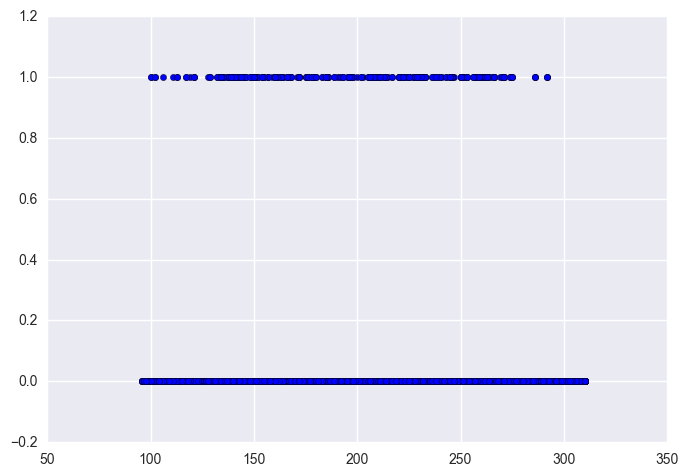

In [19]:
plt.scatter(hr['average_montly_hours'], hr['promotion_last_5years'])

In [20]:
hr['sales'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
sales = hr.groupby('sales').sum()
sales

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
sales,,,,,,,,,
0,2543.81,2938.23,15634,831773,14631,587,1014,100,2310
1,446.51,550.49,2934,154292,2702,96,204,14,483
2,442.52,523.84,2701,146828,2480,89,215,15,449
3,1653.48,1961.39,10548,550793,9279,381,697,28,1549
4,1378.19,1611.81,8479,447490,7563,345,555,20,1224
5,391.45,456.12,2432,126787,2711,103,91,69,675
6,758.46,879.55,4683,248119,4256,164,273,3,701
7,558.91,644.71,3434,180369,3135,132,198,0,519
8,530.76,614.23,3164,171073,3063,138,203,43,536


In [22]:
Left = hr.groupby('left').sum()
Left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,7620.30,8176.43,43274,2274860,38627,2000,300,38957,7439
1,1571.59,2564.38,13768,740694,13843,169,19,11137,1481


In [23]:
Satis = hr.groupby('satisfaction_level').sum()
Satis

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,,,,,,,,,
0.09,169.95,1205,53760,801,4,195,0,605,86
0.10,310.77,2223,98702,1467,19,358,0,1224,162
0.11,291.59,2071,93130,1367,17,335,3,996,127
0.12,21.23,129,6835,125,2,4,0,116,20
0.13,39.84,239,10525,237,6,3,0,148,31
0.14,50.48,336,15014,358,20,10,0,233,49
0.15,54.30,336,15664,332,14,3,4,235,54
0.16,59.94,370,16112,361,21,1,7,276,59
0.17,49.91,335,15612,312,10,5,0,251,49


In [24]:
satisfaction_level=hr['satisfaction_level']
last_evaluation=hr['last_evaluation']
number_project=hr['number_project']
average_montly_hours=hr['average_montly_hours']
time_spend_company=hr['time_spend_company']
Work_accident=hr['Work_accident']

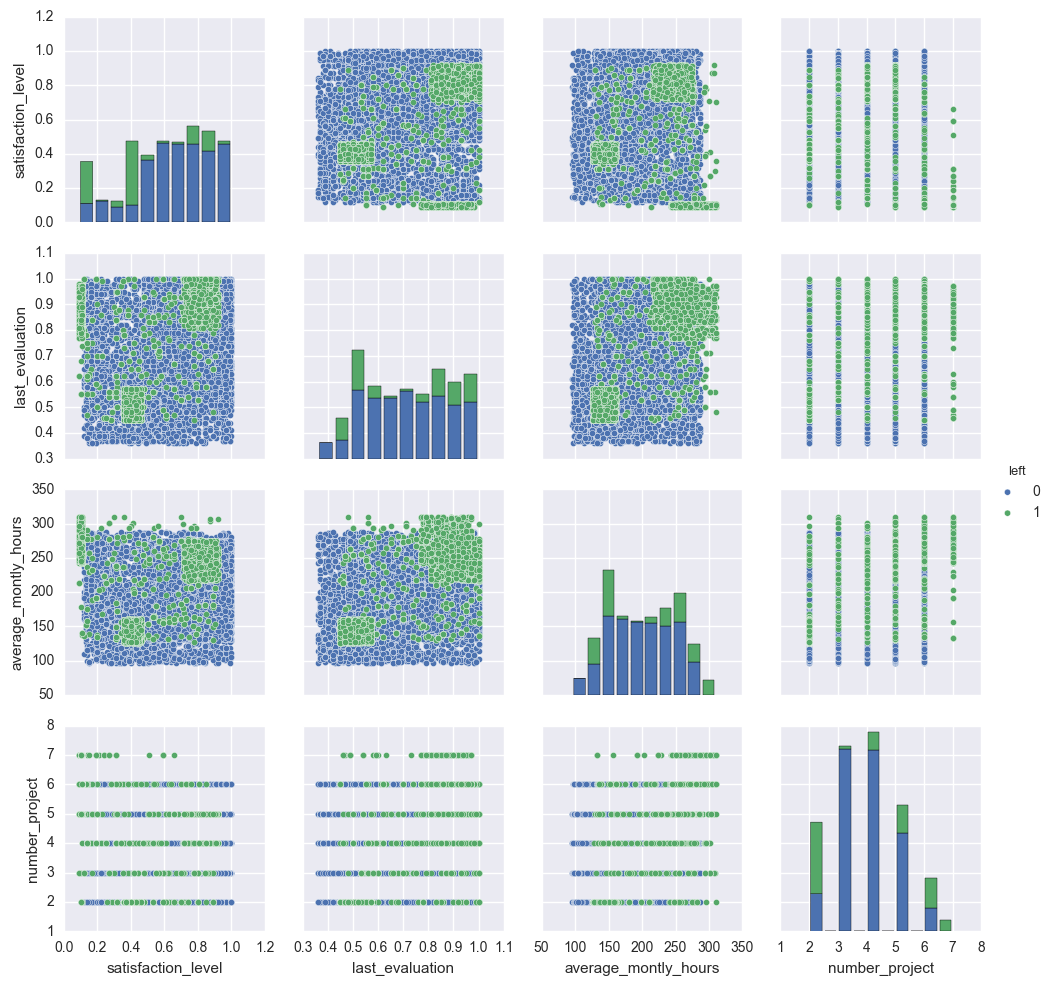

In [25]:
sb.pairplot(hr, hue="left", vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours','number_project'])
plt.show()

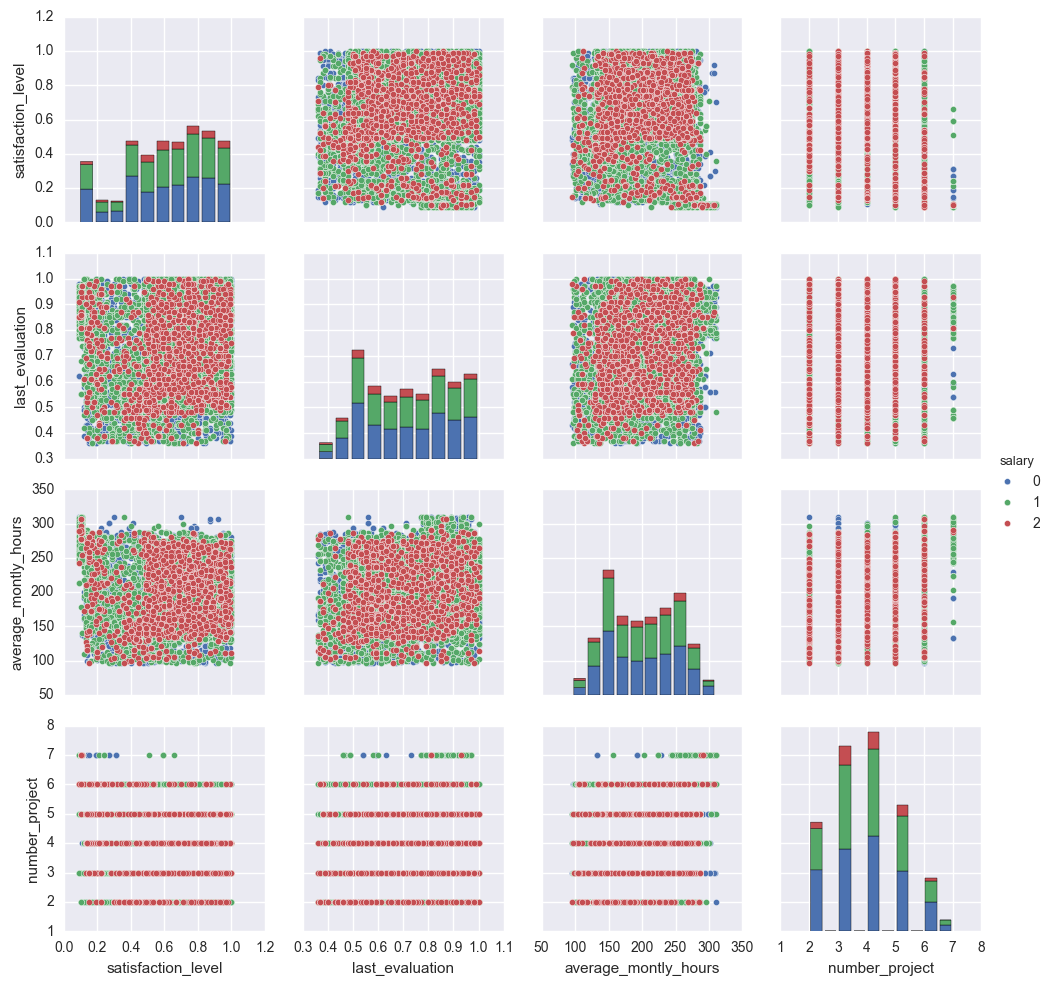

In [26]:
sb.pairplot(hr, hue="salary", vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours','number_project'])
plt.show()

In [27]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [28]:
#Creating dummy variables for the column:sales
#dummies=pd.get_dummies(hr['sales'],prefix='sales')
#hr=pd.concat([hr,dummies],axis=1)
#hr.drop(['sales'],axis=1,inplace=True)
#hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_0,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9
0,0.38,0.53,2,157,3,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.10,0.77,6,247,4,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.92,0.85,5,259,5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.89,1.00,5,224,5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.42,0.53,2,142,3,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
